In [ ]:
from states_data_uconn_functions import *

In [23]:
src = "../../../../../../media/mods-pred/Datasets/Data_uconn_h5/50/1.h5"
df = load_data(src)
df = df[0:44219]

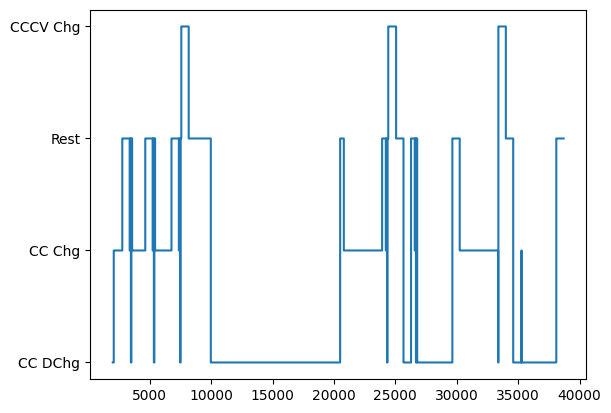

In [24]:
dfTime1 = df["Time (s)"].astype(float)
dfState1 = df["State"]
plt.plot(dfTime1, dfState1)
plt.show()

In [25]:
# Convert values to float
df["Time (s)"] = df["Time (s)"].astype(float)
df["Voltage (V)"] = df["Voltage (V)"].astype(float)
df["Current (A)"] = df["Current (A)"].astype(float)

# Identify changes in status to segment the data
df["state_change"] = (df["State"] != df["State"].shift()).cumsum()

# Group by status change segments
grouped = df.groupby("state_change")

results = []

for _, g in grouped:
    subset = g.iloc[1:-1]

    if subset.empty or subset["State"].isna().all():
        continue

    status = subset["State"].iloc[0]
    start_time = subset["Time (s)"].iloc[0]
    end_time = subset["Time (s)"].iloc[-1]
    duration = end_time - start_time

    avg_current = subset["Current (A)"].mean()
    std_current = subset["Current (A)"].std()

    avg_tension = subset["Voltage (V)"].mean()
    std_tension = subset["Voltage (V)"].std()

    results.append({
        "status": status,
        "start_time": start_time,
        "end_time": end_time,
        "duration": duration,
        "avg_current": avg_current,
        "std_current": std_current,
        "avg_tension": avg_tension,
        "std_tension": std_tension
    })

results = pd.DataFrame(results)

results

,status,start_time,end_time,duration,avg_current,std_current,avg_tension,std_tension
0,CC DChg,1994.4,2075.1,80.7,-1.200566,7.568448e-05,2.419228,0.188601
1,CC Chg,2075.3,2769.9,694.6,1.200567,7.608242e-05,3.192753,0.177306
2,Rest,2770.1,3369.0,598.9,0.000000,0.000000e+00,3.263525,0.004792
3,CC Chg,3370.1,3409.0,38.9,0.491784,4.272999e-01,3.275124,0.012018
4,Rest,3410.1,3469.0,58.9,0.000000,0.000000e+00,3.269540,0.003529
5,CC DChg,3470.1,3509.0,38.9,-0.491792,4.272948e-01,3.249912,0.012372
6,Rest,3510.1,3569.0,58.9,0.000000,0.000000e+00,3.254247,0.003310
7,CC Chg,3570.1,4640.0,1069.9,1.200539,5.381671e-05,3.351545,0.015359
8,Rest,4640.3,5239.2,598.9,0.000000,0.000000e+00,3.311077,0.005630
9,CC Chg,5240.3,5279.2,38.9,0.491787,4.272760e-01,3.322195,0.012165


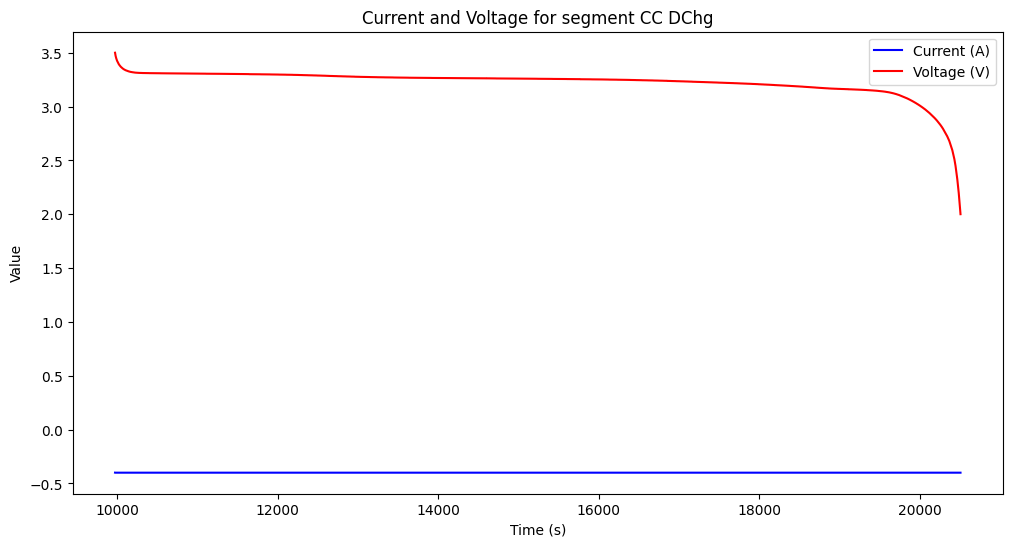

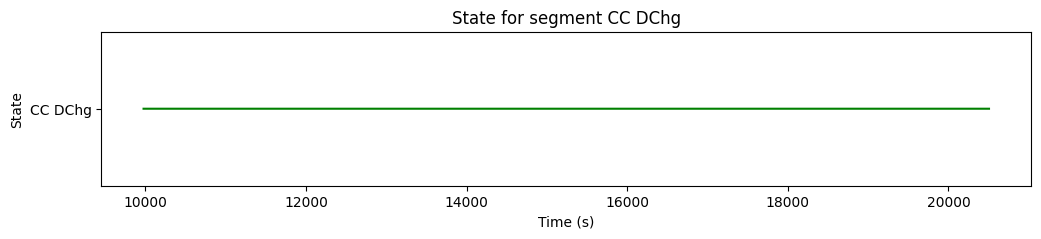

In [26]:
plot_segment(21, df, results)

In [ ]:
# Dúvidas:
# 1. Separar ciclos por arquivo?
# 2. Estados diferentes do dataset de Munique
# 3. Impacto dos valores estranhos de desvio padrão